# Recommendation System

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
product_name_table = pd.read_csv('./Looker Ecommerce BigQuery Dataset/products.csv')

In [3]:
product_name_table

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1
...,...,...,...,...,...,...,...,...,...
29115,5676,12.42338,Pants & Capris,WHAT GOES AROUND COMES AROUND Women's Colette ...,What Goes Around Comes Around,24.17,Women,3A01FC0853EBEBA94FDE4D1CC6FB842A,10
29116,6538,13.67500,Shorts,WHAT GOES AROUND COMES AROUND Women's Mimi Shorts,What Goes Around Comes Around,25.00,Women,741A0099C9AC04C7BFC822CAF7C7459F,10
29117,6712,12.40000,Shorts,WHAT GOES AROUND COMES AROUND Women's Fifi Short,What Goes Around Comes Around,25.00,Women,5726DAF2C9EE0F955ECA58291C26D2F3,10
29118,6821,13.47500,Shorts,WHAT GOES AROUND COMES AROUND Women's Ferguson...,What Goes Around Comes Around,25.00,Women,BA0A4D6ECEA3E9E126DD3B6D77291C97,10


In [4]:
product_name_table = product_name_table.drop(columns=['sku', 'distribution_center_id', 'cost'])
product_name_table = product_name_table.drop_duplicates()
product_name_table['name'] = product_name_table['name'].fillna('')
product_name_table['brand'] = product_name_table['brand'].fillna('')
product_name_table = product_name_table.set_index('id')

## 컨텐츠 기반 필터링

### 상품 특성 기반
- 상품의 특성을 수치형 테이블화

In [5]:
product_name_table['name'].nunique()

27310

In [6]:
product_attr = product_name_table[['department', 'category', 'brand', 'retail_price']]

In [7]:
product_attr.head()

,department,category,brand,retail_price
id,,,,
13842,Women,Accessories,MG,6.25
13928,Women,Accessories,MG,5.95
14115,Women,Accessories,MG,10.99
14157,Women,Accessories,MG,10.99
14273,Women,Accessories,MG,15.99


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

product_attr = product_attr.assign(department=le.fit_transform(product_attr.department))
#product_attr['brand'] = le.fit_transform(product_attr.brand)
#product_attr['category'] = le.fit_transform(product_attr.category)

In [9]:
product_attr['brand'].nunique()

2757

In [10]:
product_attr['category'].nunique()

26

In [11]:
product_attr = product_attr[['department', 'retail_price', 'brand']].merge(pd.get_dummies(product_attr['category']), left_index=True, right_index=True)
product_attr = product_attr.merge(pd.get_dummies(product_attr['brand']), left_index=True, right_index=True)
product_attr = product_attr.drop(columns='brand')

In [12]:
product_attr.head()

,department,retail_price,Accessories,Active,Blazers & Jackets,Clothing Sets,Dresses,Fashion Hoodies & Sweatshirts,Intimates_x,Jeans,...,point6,prAna,robesale,stonepowerss,tabbisocks,tasc Performance,turkishtowels,under.me,vip boutique,wear ease
id,,,,,,,,,,,,,,,,,,,,,
13842,1,6.25,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13928,1,5.95,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14115,1,10.99,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14157,1,10.99,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14273,1,15.99,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
similarity_matrix = cosine_similarity(product_attr)
similarity_matrix

array([[1.        , 0.99991642, 0.99350597, ..., 0.96752744, 0.96752744,
        0.96427508],
       [0.99991642, 1.        , 0.9919519 , ..., 0.9642891 , 0.9642891 ,
        0.96077069],
       [0.99350597, 0.9919519 , 1.        , ..., 0.98903187, 0.98903187,
        0.98814447],
       ...,
       [0.96752744, 0.9642891 , 0.98903187, ..., 1.        , 1.        ,
        0.99790498],
       [0.96752744, 0.9642891 , 0.98903187, ..., 1.        , 1.        ,
        0.99790498],
       [0.96427508, 0.96077069, 0.98814447, ..., 0.99790498, 0.99790498,
        1.        ]])

In [14]:
np.fill_diagonal(similarity_matrix, 0)

In [15]:
def cosine_similarity_recommendation(product_id, k=10):
    print('If you like \'{}\'...'.format(product_name_table.loc[product_id, 'name']))
    print('- department: {}\n- category: {}\n- brand: {}\n- sale_price: {}'.format(
                product_name_table.loc[product_id, 'department'],
                product_name_table.loc[product_id, 'category'],
                product_name_table.loc[product_id, 'brand'],
                product_name_table.loc[product_id, 'retail_price'],
    ))

    idx = np.argwhere(product_name_table.index==product_id)[0][0]

    print('\n\n\n=====Similarity Products=====')
    product_similarities = similarity_matrix[idx]
    top_k_similar_products = np.argsort(product_similarities)[-k-1:-1][::-1]    # 오름차순 -> 끝에서 k개 & [::-1] ->역순으로 배열
    similar_products_attr = product_name_table.iloc[top_k_similar_products]
    similarity = np.sort(product_similarities)[-k-1:-1][::-1]
    
    for i, (product_id, product) in enumerate(similar_products_attr.iterrows(), start=1):
        print('{}. {}\ndepartment: {}\ncategory: {}\nbrand: {}\nsale_price: {}\nsimilarity: {}'.format(
                i,
                product['name'],
                product.department,
                product.category,
                product.brand,
                product.retail_price,
                similarity[i-1]
            ),
            end='\n\n')

In [16]:
cosine_similarity_recommendation(4073)

If you like 'Brave Soul Ladies/Womens Stripe Pattern Summer Play Suit'...
- department: Women
- category: Jumpsuits & Rompers
- brand: Brave Soul
- sale_price: 13.199999809265137



=====Similarity Products=====
1. Allegra K Woman Pink Chiffon Accent Navy Blue Elastic Waist Jumpsuit XS
department: Women
category: Jumpsuits & Rompers
brand: Allegra K
sale_price: 20.21999931335449
similarity: 0.9952855531064341

2. Rocawear Strapless Shortall
department: Women
category: Jumpsuits & Rompers
brand: Rocawear
sale_price: 18.780000686645508
similarity: 0.9952761174917009

3. Anna-Kaci S/M Fit Brown Wild Cheetah Mock One Shoulder Layer Lace Trim Romper
department: Women
category: Jumpsuits & Rompers
brand: Anna-Kaci
sale_price: 21.89999961853028
similarity: 0.9952526376607268

4. ROJAS 'Indian Jumper'
department: Women
category: Jumpsuits & Rompers
brand: Rojas
sale_price: 21.989999771118164
similarity: 0.9952499190161952

5. Jenni Junior's Rompers
department: Women
category: Jumpsuits & Rompe

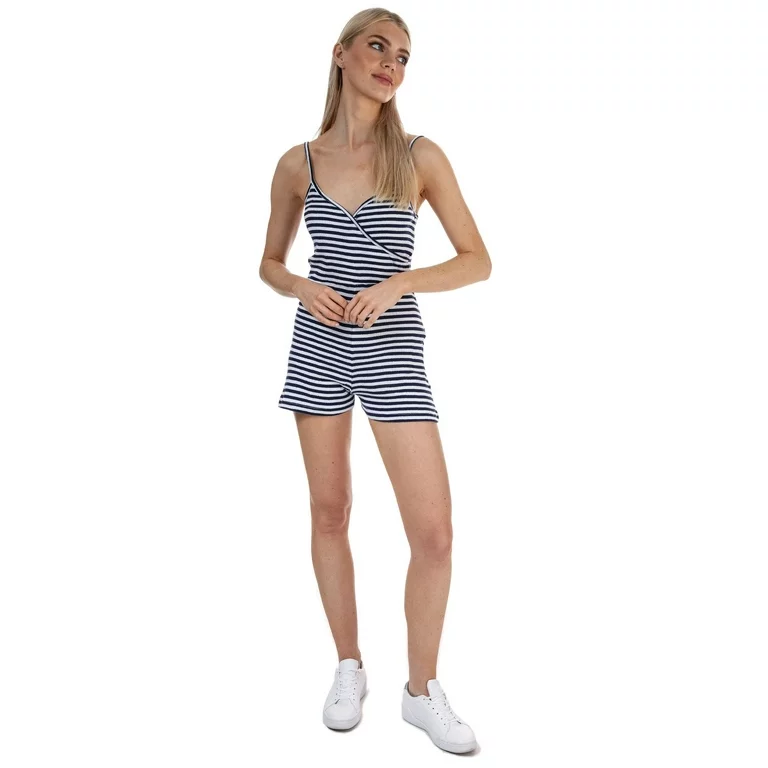 ===추천==>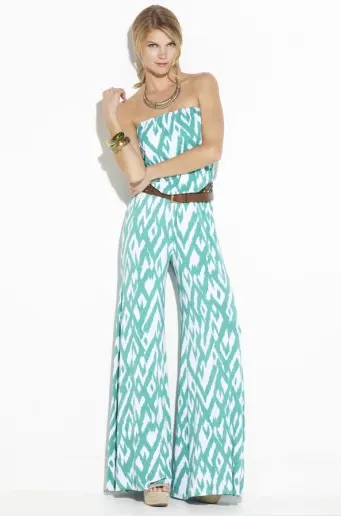

In [17]:
# 유사한 제품 최대 10개 추천
cosine_similarity_recommendation(24543)

If you like 'Carhartt Mens Work Wear Cushioned Crew Sock'...
- department: Men
- category: Socks
- brand: Carhartt
- sale_price: 16.0



=====Similarity Products=====
1. Carhartt Men's Low Cut Work Sock
department: Men
category: Socks
brand: Carhartt
sale_price: 16.5
similarity: 0.9999964667494624

2. Carhartt Men's Liner Socks 3 Pack
department: Men
category: Socks
brand: Carhartt
sale_price: 15.0
similarity: 0.9999829251009542

3. Carhartt Men's Cotton 3 Pack Crew Work Socks
department: Men
category: Socks
brand: Carhartt
sale_price: 14.550000190734863
similarity: 0.9999618657814688

4. Carhartt Men's Steel Toe Arctic Wool Boot Sock
department: Men
category: Socks
brand: Carhartt
sale_price: 18.0
similarity: 0.9999524409673239

5. Carhartt Men's Extremes Cold Weather Boot Sock
department: Men
category: Socks
brand: Carhartt
sale_price: 13.949999809265137
similarity: 0.9999171453161074

6. Carhartt Men's Triple Blend Thermal Crew Socks
department: Men
category: Socks
brand: Carhartt
s

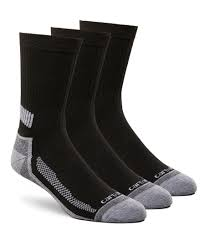 ==== 추천 ====>    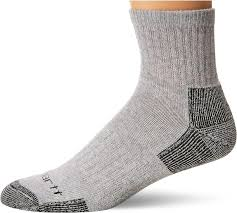

In [18]:
similarity_matrix

array([[0.        , 0.99991642, 0.99350597, ..., 0.96752744, 0.96752744,
        0.96427508],
       [0.99991642, 0.        , 0.9919519 , ..., 0.9642891 , 0.9642891 ,
        0.96077069],
       [0.99350597, 0.9919519 , 0.        , ..., 0.98903187, 0.98903187,
        0.98814447],
       ...,
       [0.96752744, 0.9642891 , 0.98903187, ..., 0.        , 1.        ,
        0.99790498],
       [0.96752744, 0.9642891 , 0.98903187, ..., 1.        , 0.        ,
        0.99790498],
       [0.96427508, 0.96077069, 0.98814447, ..., 0.99790498, 0.99790498,
        0.        ]])

In [19]:
# np.save('./attr_similarity_matrix.npy', similarity_matrix)

### Bag of Words

In [20]:
import re

def rmv_attr(x):
    if x.isnull().values.any(): # brand가 NaN
        return x
    else:
        result = x['name']

        brand_name = re.compile(re.escape(x['brand']), re.IGNORECASE)

        result = brand_name.sub('', result)  # 브랜드 이름 제거

        x['name'] = result
        return x

In [22]:
product_name_table[['name', 'brand']]

,name,brand
id,,
13842,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG
13928,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG
14115,Enzyme Regular Solid Army Caps-Black W35S45D,MG
14157,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG
14273,Washed Canvas Ivy Cap - Black W11S64C,MG
...,...,...
5676,WHAT GOES AROUND COMES AROUND Women's Colette ...,What Goes Around Comes Around
6538,WHAT GOES AROUND COMES AROUND Women's Mimi Shorts,What Goes Around Comes Around
6712,WHAT GOES AROUND COMES AROUND Women's Fifi Short,What Goes Around Comes Around


In [23]:
from collections import Counter

documents = product_name_table[['name', 'brand']].apply(rmv_attr, axis=1)['name'].values

# Preprocess sentences: lower case and tokenize
documents = [re.sub('[^A-Za-z]', ' ', str(doc)) for doc in documents]    # 알파벳만 남기기
tokenized_documents = [re.findall('[A-Za-z]\w+', doc) for doc in documents]   # 알파벳 하나만 있는 단어 외 모든 단어를 토큰화

In [24]:
# Calculate word frequencies for each document
word_frequencies = [Counter(doc) for doc in tokenized_documents]
word_frequencies[:2]

[Counter({'Low': 1,
          'Profile': 1,
          'Dyed': 1,
          'Cotton': 1,
          'Twill': 1,
          'Cap': 1,
          'Navy': 1}),
 Counter({'Low': 1,
          'Profile': 1,
          'Dyed': 1,
          'Cotton': 1,
          'Twill': 1,
          'Cap': 1,
          'Putty': 1})]

In [25]:
# Create a DataFrame to display the results
bow_df = pd.DataFrame(word_frequencies, index=product_name_table.index).fillna(0)
print("Bag of Words representation:")
display(bow_df)

Bag of Words representation:


,Low,Profile,Dyed,Cotton,Twill,Cap,Navy,Putty,Enzyme,Regular,...,Flashlight,Dice,layered,zippered,Harris,Dougal,Racquel,Fifi,Ferguson,Bennet
id,,,,,,,,,,,,,,,,,,,,,
13842,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13928,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14273,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
similarity_matrix_bow = cosine_similarity(bow_df)
similarity_matrix_bow

array([[1.        , 0.85714286, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85714286, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.66666667, 1.        ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.33333333,
        1.        ]])

In [27]:
np.fill_diagonal(similarity_matrix_bow, 0)

In [28]:
def bow_cosine_similarity_recommendation(product_id, k=10):
    print('If you like \'{}\'...'.format(product_name_table.loc[product_id, 'name']))
    print('- department: {}\n- category: {}\n- brand: {}\n- sale_price: {}'.format(
                product_name_table.loc[product_id, 'department'],
                product_name_table.loc[product_id, 'category'],
                product_name_table.loc[product_id, 'brand'],
                product_name_table.loc[product_id, 'retail_price'],
    ))

    idx = np.argwhere(product_name_table.index==product_id)[0][0]

    print('\n\n\n=====Similarity Products=====')
    product_similarities = similarity_matrix_bow[idx]
    top_k_similar_products = np.argsort(product_similarities)[-k-1:-1][::-1]    # 오름차순 -> 끝에서 k개 & [::-1] ->역순으로 배열
    similar_products_attr = product_name_table.iloc[top_k_similar_products]
    similarity = np.sort(product_similarities)[-k-1:-1][::-1]
    
    for i, (product_id, product) in enumerate(similar_products_attr.iterrows(), start=1):
        print('{}. {}\ndepartment: {}\ncategory: {}\nbrand: {}\nsale_price: {}\nsimilarity: {}'.format(
                i,
                product['name'],
                product.department,
                product.category,
                product.brand,
                product.retail_price,
                similarity[i-1]
            ),
            end='\n\n')

In [29]:
bow_cosine_similarity_recommendation(4073)

If you like 'Brave Soul Ladies/Womens Stripe Pattern Summer Play Suit'...
- department: Women
- category: Jumpsuits & Rompers
- brand: Brave Soul
- sale_price: 13.199999809265137



=====Similarity Products=====
1. Womens Ladies Zigzag Pattern Leggings Pants
department: Women
category: Leggings
brand: VIP BOUTIQUE
sale_price: 16.989999771118164
similarity: 0.4629100498862757

2. Vintage Havana Womens Stripe Romper
department: Women
category: Jumpsuits & Rompers
brand: Vintage
sale_price: 48.75
similarity: 0.3779644730092272

3. Ted Baker Womens Necia Suit Blazer
department: Women
category: Blazers & Jackets
brand: Ted Baker
sale_price: 116.63999938964844
similarity: 0.3779644730092272

4. Juicy Couture Womens Stripe Shorts Romper
department: Women
category: Jumpsuits & Rompers
brand: Juicy Couture
sale_price: 71.0
similarity: 0.3779644730092272

5. FULL TILT Stripe Womens Wrap Top
department: Women
category: Sweaters
brand: Full Tilt
sale_price: 22.989999771118164
similarity: 0.3779644

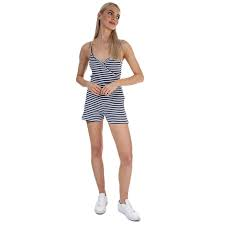 ===추천==> 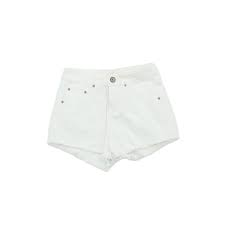 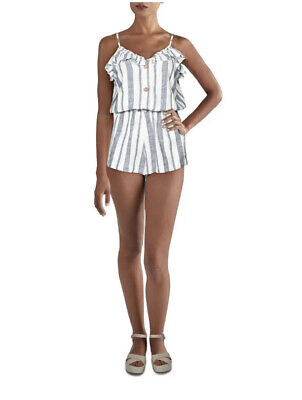

In [30]:
bow_cosine_similarity_recommendation(24543)

If you like 'Carhartt Mens Work Wear Cushioned Crew Sock'...
- department: Men
- category: Socks
- brand: Carhartt
- sale_price: 16.0



=====Similarity Products=====
1. Thorlo Mens Dress Crew Sock
department: Men
category: Socks
brand: Thorlo
sale_price: 16.989999771118164
similarity: 0.6123724356957946

2. LRG Crew Sock
department: Men
category: Socks
brand: LRG
sale_price: 5.0
similarity: 0.5773502691896258

3. LRG Crew Sock
department: Men
category: Active
brand: LRG
sale_price: 5.0
similarity: 0.5773502691896258

4. Wigwam Men's At Work DuraSole Work 2-Pack Crew Length Work Sock
department: Men
category: Socks
brand: Wigwam
sale_price: 15.0
similarity: 0.5103103630798288

5. Dickies Mens 3 Pair Industrial Strength Crew Sock
department: Men
category: Socks
brand: Dickies
sale_price: 11.0
similarity: 0.5000000000000001

6. Timberland Basic Crew Sock
department: Men
category: Socks
brand: Timberland
sale_price: 13.0
similarity: 0.4714045207910318

7. LRG Hensler Crew Sock
department:

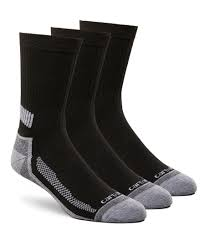 ==== 추천 ====>    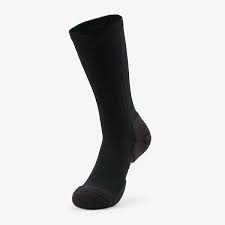

In [31]:
# np.save('./similarity_matrix_bow.npy', similarity_matrix_bow)

### 협업 필터링: 코사인 유사도 (상품 특성 + bag of words)

In [32]:
similarity_matrix_bow.shape

(29120, 29120)

In [33]:
similarity_matrix.shape

(29120, 29120)

In [34]:
collaborative_matrix = similarity_matrix_bow + similarity_matrix

In [35]:
# np.save('./collaborative_matrix.npy', collaborative_matrix)

In [36]:
def collaborative_filtering_recommendation(product_id, k=10):
    print('If you like \'{}\'...'.format(product_name_table.loc[product_id, 'name']))
    print('- department: {}\n- category: {}\n- brand: {}\n- sale_price: {}'.format(
                product_name_table.loc[product_id, 'department'],
                product_name_table.loc[product_id, 'category'],
                product_name_table.loc[product_id, 'brand'],
                product_name_table.loc[product_id, 'retail_price'],
    ))

    idx = np.argwhere(product_name_table.index==product_id)[0][0]

    print('\n\n\n=====Similarity Products=====')
    product_similarities = collaborative_matrix[idx]
    top_k_similar_products = np.argsort(product_similarities)[-k-1:-1][::-1]    # 오름차순 -> 끝에서 k개 & [::-1] ->역순으로 배열
    similar_products_attr = product_name_table.iloc[top_k_similar_products]
    similarity = np.sort(product_similarities)[-k-1:-1][::-1]
    
    for i, (product_id, product) in enumerate(similar_products_attr.iterrows(), start=1):
        print('{}. {}\ndepartment: {}\ncategory: {}\nbrand: {}\nsale_price: {}\nsimilarity: {}'.format(
                i,
                product['name'],
                product.department,
                product.category,
                product.brand,
                product.retail_price,
                similarity[i-1]
            ),
            end='\n\n')

In [37]:
collaborative_filtering_recommendation(4073)

If you like 'Brave Soul Ladies/Womens Stripe Pattern Summer Play Suit'...
- department: Women
- category: Jumpsuits & Rompers
- brand: Brave Soul
- sale_price: 13.199999809265137



=====Similarity Products=====
1. Womens Ladies Zigzag Pattern Leggings Pants
department: Women
category: Leggings
brand: VIP BOUTIQUE
sale_price: 16.989999771118164
similarity: 1.4536966453173292

2. Vintage Havana Womens Stripe Romper
department: Women
category: Jumpsuits & Rompers
brand: Vintage
sale_price: 48.75
similarity: 1.3719196904688458

3. Juicy Couture Womens Stripe Shorts Romper
department: Women
category: Jumpsuits & Rompers
brand: Juicy Couture
sale_price: 71.0
similarity: 1.371285603618268

4. Ted Baker Womens Necia Suit Blazer
department: Women
category: Blazers & Jackets
brand: Ted Baker
sale_price: 116.63999938964844
similarity: 1.3699998620900968

5. FULL TILT Stripe Womens Wrap Top
department: Women
category: Sweaters
brand: Full Tilt
sale_price: 22.989999771118164
similarity: 1.36992129

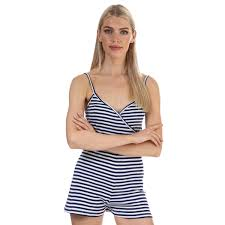===추천===>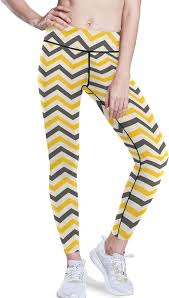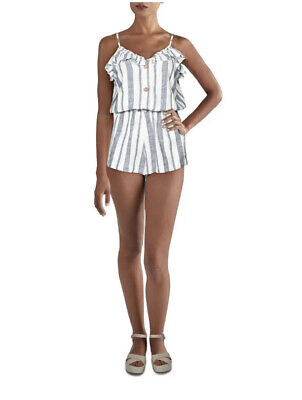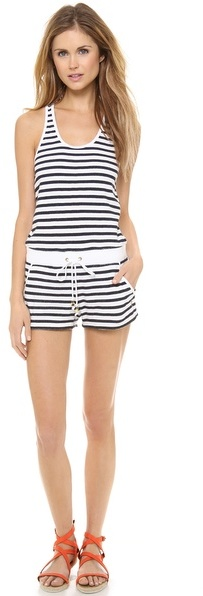

In [38]:
collaborative_filtering_recommendation(24543)

If you like 'Carhartt Mens Work Wear Cushioned Crew Sock'...
- department: Men
- category: Socks
- brand: Carhartt
- sale_price: 16.0



=====Similarity Products=====
1. Thorlo Mens Dress Crew Sock
department: Men
category: Socks
brand: Thorlo
sale_price: 16.989999771118164
similarity: 1.6087076461502168

2. LRG Crew Sock
department: Men
category: Socks
brand: LRG
sale_price: 5.0
similarity: 1.5478452280205717

3. LRG Crew Sock
department: Men
category: Active
brand: LRG
sale_price: 5.0
similarity: 1.535863808775745

4. Wigwam Men's At Work DuraSole Work 2-Pack Crew Length Work Sock
department: Men
category: Socks
brand: Wigwam
sale_price: 15.0
similarity: 1.5061611273332582

5. Dickies Mens 3 Pair Industrial Strength Crew Sock
department: Men
category: Socks
brand: Dickies
sale_price: 11.0
similarity: 1.4935983409176492

6. Wigwam Men's At Work Double Duty 2-Pack Crew Length Work Sock
department: Men
category: Socks
brand: Wigwam
sale_price: 17.579999923706055
similarity: 1.4678434470

### 실험: 유저가 유사도가 높은 제품들을 구매하는지!

In [39]:
df = pd.read_csv('./looker.csv', low_memory=False)

In [42]:
df = df[~df.status.isin(['Returned', 'Cancelled'])]

In [43]:
order_product = df[['user_id', 'product_id']].dropna(subset='product_id').groupby('user_id')['product_id'].unique().to_frame()

In [44]:
order_product

,product_id
user_id,
1.0,"[2953.0, 7656.0, 4731.0]"
2.0,[25774.0]
3.0,"[21364.0, 22308.0, 26696.0, 18177.0]"
4.0,[1035.0]
7.0,[20018.0]
...,...
99989.0,"[15531.0, 165.0]"
99996.0,"[25132.0, 28478.0, 18161.0, 27368.0]"
99998.0,"[16938.0, 19164.0, 21923.0]"


In [16]:
# collaborative_matrix = np.load('./collaborative_matrix.npy')

In [45]:
collaborative_matrix_shape = collaborative_matrix.shape
collaborative_matrix_shape

(29120, 29120)

In [46]:
collaborative_matrix = collaborative_matrix.reshape([-1,1])

In [47]:
from sklearn.preprocessing import minmax_scale
collaborative_matrix = minmax_scale(collaborative_matrix)

In [48]:
collaborative_matrix = collaborative_matrix.reshape(collaborative_matrix_shape)

In [49]:
def chk_collaborative_sim(products:list):
    products_num = len(products)
    if products_num > 1:
        # print(f"구매한 제품 수: {products_num}")

        idx_list = []
        for product_id in products:
            idx_list.append(np.argwhere(product_name_table.index==product_id)[0][0])

        sim_list = []
        for i, idx in enumerate(idx_list):
            if i==0:
                product_similarities = collaborative_matrix[idx]
            else:
                sim_list.append(product_similarities[idx])

        # print(f'구매한 상품 간의 평균 유사도: {np.mean(sim_list)}')
        return np.mean(sim_list)
    else:
        return np.nan

In [50]:
order_product['sim_mean'] = order_product['product_id'].apply(chk_collaborative_sim)

In [51]:
np.mean(order_product['sim_mean'])

0.5373812829084108